### 1. Read the dataset and understand the features and target variable. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Qualitative_Bankruptcy.data.txt', sep=",", header=None)

In [3]:
info = pd.read_fwf('Qualitative_Bankruptcy.info.txt',header = None)

In [4]:
print(info)

                                                    0          1    2  \
0           1. Title: Qualitative_Bankruptcy database        NaN  NaN   
1                                                 NaN        NaN  NaN   
2                               2. Source Information        NaN  NaN   
3   -- Creator:  Martin.A, Uthayakumar.j and Nadar...        NaN  NaN   
4              -- Guided By: Dr.V.Prasanna Venkatesan        NaN  NaN   
5                         -- Date:      February 2014        NaN  NaN   
6                                                 NaN        NaN  NaN   
7                                      3. Past Usage:        NaN  NaN   
8   The attributes or parameters which we used for...  discovery   of   
9   decision rules from qualitative bankruptcy dat...       Han.  NaN   
10                                                NaN        NaN  NaN   
11                        4. Number of Instances: 250        NaN  NaN   
12                                                N

Attribute Information: (P=Positive,A-Average,N-negative,B-Bankruptcy,NB-Non-Bankruptcy)
 1. Industrial Risk: {P,A,N}
 2. Management Risk: {P,A,N}
 3. Financial Flexibility: {P,A,N}
 4. Credibility: {P,A,N}
 5. Competitiveness: {P,A,N}
 6. Operating Risk: {P,A,N}
 7. Class: {B,NB}

In [5]:
data.columns = ["IR", "MR", "FF", "CR","CO", "OP", "Class"]

In [6]:
print(data.head())
data.shape

  IR MR FF CR CO OP Class
0  P  P  A  A  A  P    NB
1  N  N  A  A  A  N    NB
2  A  A  A  A  A  A    NB
3  P  P  P  P  P  P    NB
4  N  N  P  P  P  N    NB


(250, 7)

In [7]:
print("Missing Values in Data :\n")
print(data.isnull().sum())

Missing Values in Data :

IR       0
MR       0
FF       0
CR       0
CO       0
OP       0
Class    0
dtype: int64


### 2. Encode independent features. 

In [8]:
data["Class"].value_counts()

NB    143
B     107
Name: Class, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
data["Class_code"] = lb_make.fit_transform(data["Class"])
data[["Class", "Class_code"]].head()

,Class,Class_code
0,NB,1
1,NB,1
2,NB,1
3,NB,1
4,NB,1


In [10]:
cat_cols=  ["IR", "MR", "FF", "CR","CO", "OP"]
dum_df = pd.get_dummies(data, columns = cat_cols,drop_first=True)
print(dum_df.head(6))
print("\n\n\n")
print(dum_df.shape)

  Class  Class_code  IR_N  IR_P  MR_N  MR_P  FF_N  FF_P  CR_N  CR_P  CO_N  \
0    NB           1     0     1     0     1     0     0     0     0     0   
1    NB           1     1     0     1     0     0     0     0     0     0   
2    NB           1     0     0     0     0     0     0     0     0     0   
3    NB           1     0     1     0     1     0     1     0     1     0   
4    NB           1     1     0     1     0     0     1     0     1     0   
5    NB           1     0     0     0     0     0     1     0     1     0   

   CO_P  OP_N  OP_P  
0     0     0     1  
1     0     1     0  
2     0     0     0  
3     1     0     1  
4     1     1     0  
5     1     0     0  




(250, 14)


In [11]:
dum_df.columns

Index(['Class', 'Class_code', 'IR_N', 'IR_P', 'MR_N', 'MR_P', 'FF_N', 'FF_P',
       'CR_N', 'CR_P', 'CO_N', 'CO_P', 'OP_N', 'OP_P'],
      dtype='object')

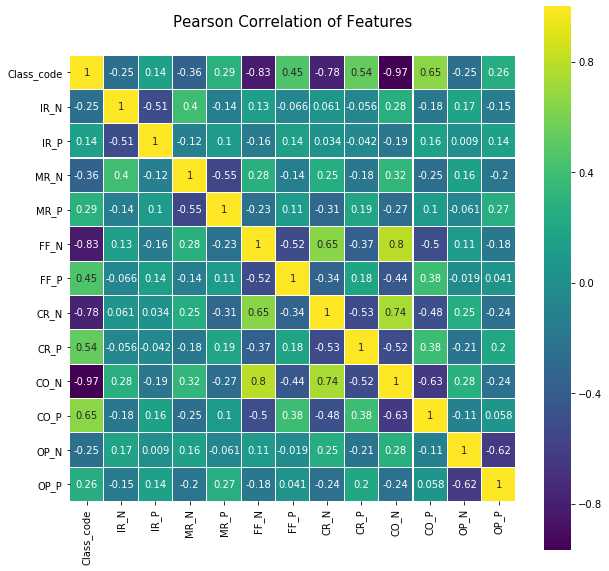

In [12]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(dum_df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

**There are features with significant correlarion**

### 3. Separate the dependant variable from the rest of the train data 

In [13]:
X_ = dum_df.drop(["Class", "Class_code"], axis=1)
y_ = dum_df.pop("Class_code")

In [14]:
# convert dataframe to array by using .to_numpy()
X1 =  X_.to_numpy()
y1 =  y_.to_numpy()
print(X1.shape,y1.shape)

(250, 12) (250,)


### 4. Split the dataset into training and test data ( Take 80:20 ratio). 

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.20, random_state=7)

### 5. Apply PCA on the independent features of train data. 

#Step 1 - Create covariance matrix

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_std = sc.fit_transform(X_train)  # scale data 

In [17]:
X_std

array([[ 1.26388393, -0.63134887,  1.        , ..., -0.7257531 ,
        -0.92295821, -0.67812537],
       [ 1.26388393, -0.63134887,  1.        , ..., -0.7257531 ,
         1.08347268, -0.67812537],
       [-0.79121189,  1.58391033, -1.        , ...,  1.37787907,
         1.08347268, -0.67812537],
       ...,
       [-0.79121189,  1.58391033,  1.        , ..., -0.7257531 ,
        -0.92295821,  1.47465358],
       [-0.79121189, -0.63134887, -1.        , ..., -0.7257531 ,
         1.08347268, -0.67812537],
       [ 1.26388393, -0.63134887, -1.        , ..., -0.7257531 ,
         1.08347268, -0.67812537]])

In [18]:
Train_data_df = pd.DataFrame(X_std)

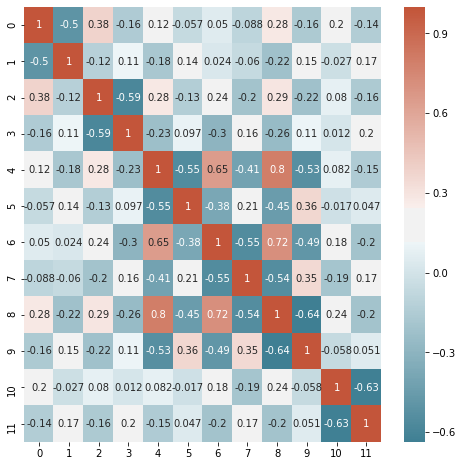

In [19]:
plt.figure(figsize=(8,8))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(Train_data_df.corr(),cmap=cmap, linecolor='white', annot=True)

In [20]:
cov_matrix = np.cov(X_std.T)

print('Covariance Matrix \n \n', cov_matrix)

Covariance Matrix 
 
 [[ 1.00502513 -0.50204094  0.38210324 -0.15720694  0.11837241 -0.05749894
   0.04998066 -0.08874652  0.28132267 -0.16434547  0.19850375 -0.13906113]
 [-0.50204094  1.00502513 -0.12245151  0.11403672 -0.17970571  0.13795572
   0.02413548 -0.06001216 -0.21994144  0.14835012 -0.02724931  0.16883089]
 [ 0.38210324 -0.12245151  1.00502513 -0.58798856  0.28146333 -0.13237242
   0.23752364 -0.20384824  0.29395176 -0.22199133  0.08066054 -0.16226977]
 [-0.15720694  0.11403672 -0.58798856  1.00502513 -0.23086051  0.09732305
  -0.29936844  0.1581533  -0.26011526  0.10683521  0.01249156  0.19694505]
 [ 0.11837241 -0.17970571  0.28146333 -0.23086051  1.00502513 -0.5524645
   0.65548981 -0.41099734  0.80356131 -0.53267433  0.08229021 -0.15429532]
 [-0.05749894  0.13795572 -0.13237242  0.09732305 -0.5524645   1.00502513
  -0.3789984   0.21517711 -0.45088396  0.36643183 -0.01690157  0.04727887]
 [ 0.04998066  0.02413548  0.23752364 -0.29936844  0.65548981 -0.3789984
   1.0050251

#Step 2- Get eigen values and eigen vector

In [21]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.17215662  0.46870604  0.27948034  0.26088483  0.38237961  0.13047775
   0.28931985  0.20214408  0.24304366  0.28165454 -0.2765297  -0.31911063]
 [ 0.13000975 -0.37162501 -0.33321081 -0.48844817  0.11055145 -0.02292594
   0.50151183 -0.06236084  0.19018445  0.36880125 -0.09895788 -0.21272965]
 [-0.24322436  0.29846954  0.29239325 -0.44998469  0.03220868 -0.12118346
   0.40766    -0.05345914 -0.08611263 -0.36735614  0.48565015 -0.02807904]
 [ 0.21042631 -0.2300055  -0.25229809  0.58269854  0.2470628  -0.11226876
   0.28240073  0.04244293  0.03852854 -0.26999899  0.44926964 -0.26115767]
 [-0.40789036 -0.19747525  0.0527703   0.09381331 -0.19658417  0.52421526
  -0.08477319 -0.01035533  0.35236601  0.31014416  0.48712568  0.06826424]
 [ 0.27442455  0.22469888 -0.1039472  -0.21844835  0.58575812  0.07235583
  -0.4313167  -0.39893914  0.25367775  0.04205059  0.23519086  0.02658961]
 [-0.38978623 -0.20779136 -0.1370088  -0.13380002  0.05323474  0.08413474
  -0.21649381 

In [22]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(4.117116711585084, array([-0.17215662,  0.13000975, -0.24322436,  0.21042631, -0.40789036,
        0.27442455, -0.38978623,  0.30594243, -0.44604012,  0.33528077,
       -0.14704072,  0.17268129])), (1.74652119379006, array([ 0.46870604, -0.37162501,  0.29846954, -0.2300055 , -0.19747525,
        0.22469888, -0.20779136,  0.14426352, -0.09983499,  0.1870667 ,
        0.35892796, -0.41588145])), (1.4765707403170336, array([ 0.27948034, -0.33321081,  0.29239325, -0.25229809,  0.0527703 ,
       -0.1039472 , -0.1370088 ,  0.21395179, -0.01615782, -0.08869868,
       -0.58577999,  0.4819854 ])), (1.2515607687328503, array([ 0.26088483, -0.48844817, -0.44998469,  0.58269854,  0.09381331,
       -0.21844835, -0.13380002,  0.14821933,  0.11538821, -0.17907615,
        0.09645604,  0.01597398])), (0.8132766817045468, array([ 0.38237961,  0.11055145,  0.03220868,  0.2470628 , -0.19658417,
        0.58575812,  0.05323474, -0.49879998,  0.1078719 , -0.19791246,
       -0.00613673,  0.30862625])

### 6. Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance). 

In [23]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 

print("Variance is :", var_explained)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance.

print("\n\nCumulative Variance Explained", cum_var_exp)

Variance is : [0.3413775940022632, 0.1448157156517591, 0.12243232388462068, 0.10377524707409881, 0.06743419152466866, 0.04981806969697752, 0.04734630463412886, 0.03675598810562667, 0.02928540488668088, 0.02458189932347442, 0.021603346690090015, 0.010773914525611362]


Cumulative Variance Explained [0.34137759 0.48619331 0.60862563 0.71240088 0.77983507 0.82965314
 0.87699945 0.91375543 0.94304084 0.96762274 0.98922609 1.        ]


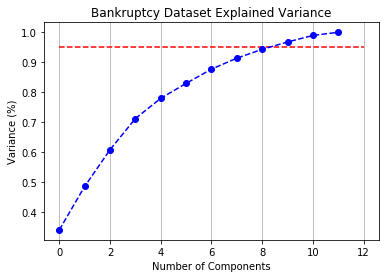

In [24]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(cum_var_exp ,linestyle='--', marker='o', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Bankruptcy Dataset Explained Variance')
plt.hlines(y=.95, xmin=0, xmax=12, linestyle="dashed", color='r')
plt.grid(True, which='major', axis='x')
#plt.show()

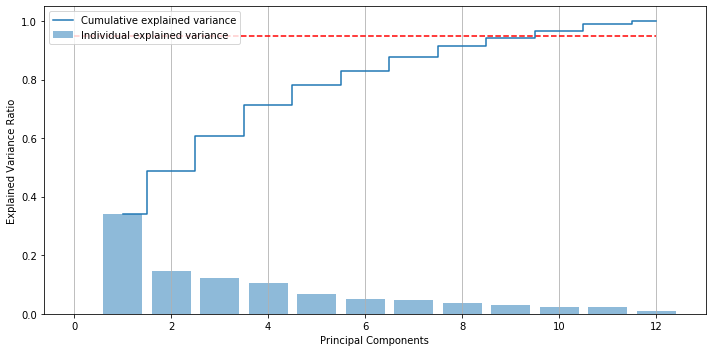

In [25]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eigenvalues.size + 1), var_explained, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigenvalues.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.hlines(y=.95, xmin=0, xmax=12, linestyle="dashed", color='r')
plt.grid(True, which='major', axis='x')
plt.tight_layout()
plt.show()

##### Above plots shows that selecting 9 components we can preserve around 95% of the total variance of the data.

### 7. Transform the data using PCA ( select optimum number of PCs). 

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca=PCA(n_components=9) # Reducing from 12 to 9 dimention space
PCA_Xtrain_fit = pca.fit_transform(X_std)  ## projecting original data into principal components

In [28]:
Proj_Xtrain_df = pd.DataFrame(PCA_Xtrain_fit) # converting array to dataframe for pairplot

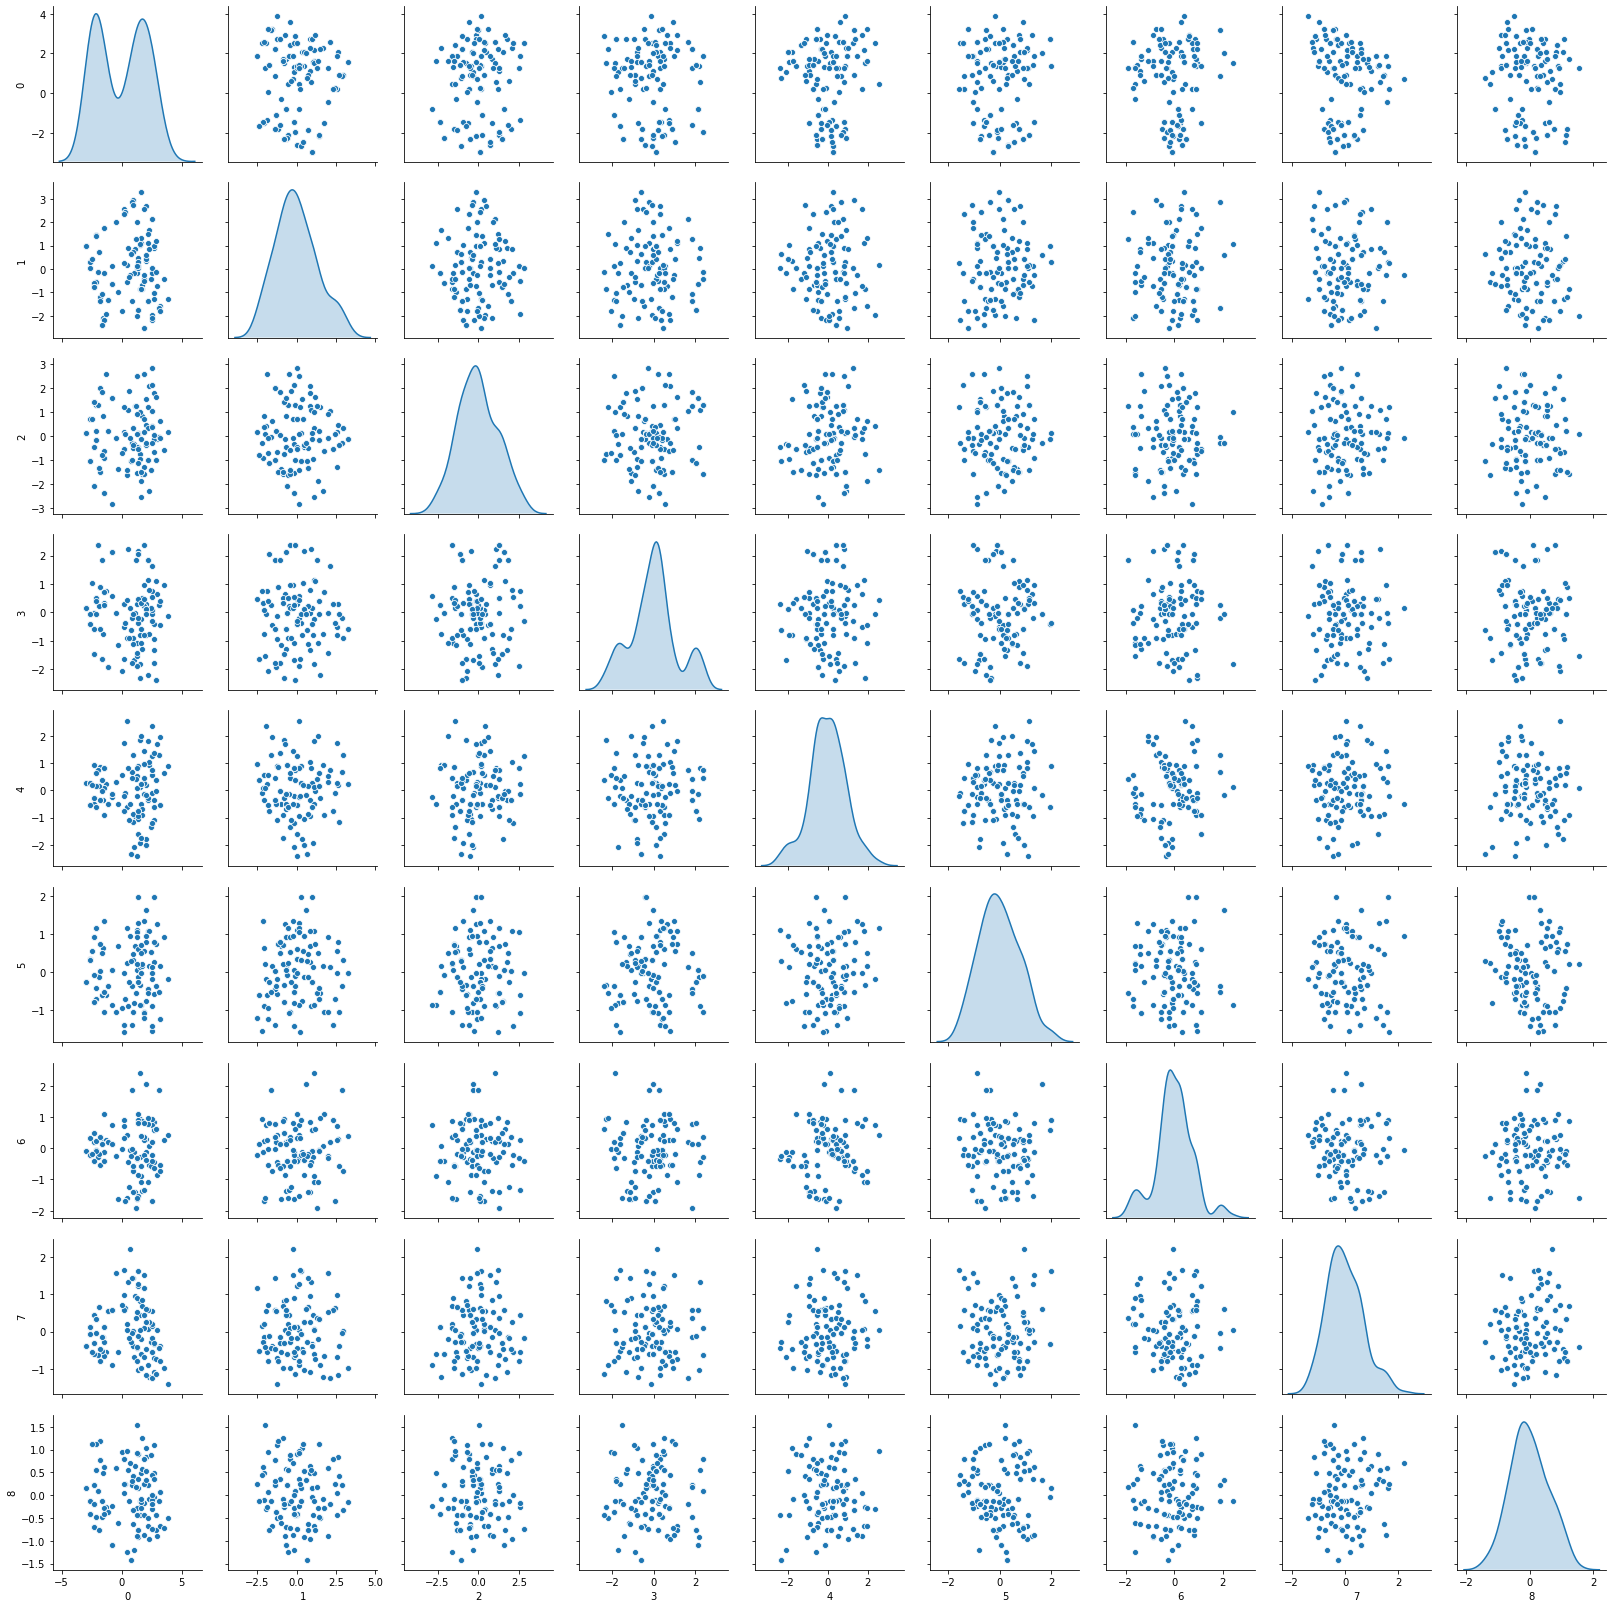

In [29]:
sns.pairplot(Proj_Xtrain_df,diag_kind='kde')

We see cloud like pints in the plot that means all the PCA dimentions are independent of each other. Cov

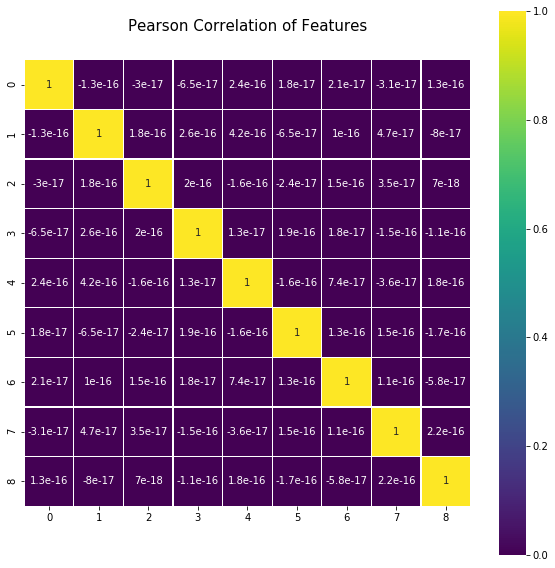

In [30]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(Proj_Xtrain_df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

### 8. Apply KMeans algorithm on the above transformed data. 

In [31]:
from sklearn.cluster import KMeans

cluster_range = range( 1, 10)  
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 20, random_state=5)
  clusters.fit(Proj_Xtrain_df)
  labels = clusters.labels_              # Labels
  centroids = clusters.cluster_centers_  #centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:11]

,num_clusters,cluster_errors
0,1,2263.298015
1,2,1547.651813
2,3,1350.170188
3,4,1231.786736
4,5,1108.748876
5,6,1022.798266
6,7,937.776452
7,8,865.517176
8,9,811.834172


### 9. Select optimal number of clusters and form clusters out of the train data. 

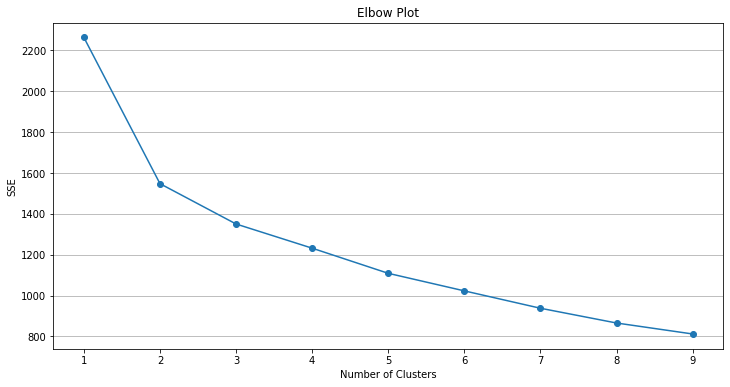

In [32]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.xlabel('Number of Clusters')
plt.ylabel('SSE') #for each component
plt.title('Elbow Plot')
#plt.gca().yaxis.grid(True)
plt.grid(True, which='major', axis='y')
plt.show()

#### Elbow is difficult to predict as SSE decline is slowing down after 5-6 clusters.

For n_clusters = 2 The average silhouette_score is : 0.2958305260341495


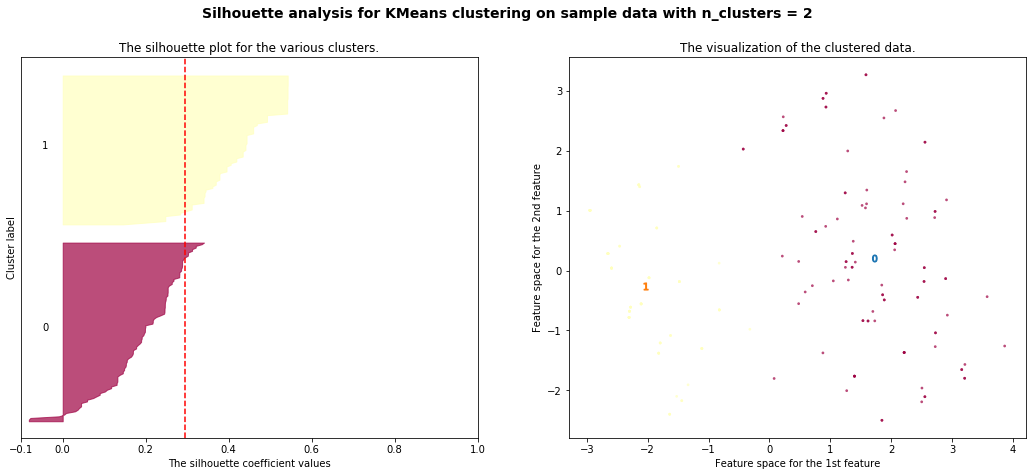

For n_clusters = 3 The average silhouette_score is : 0.2704455257331196


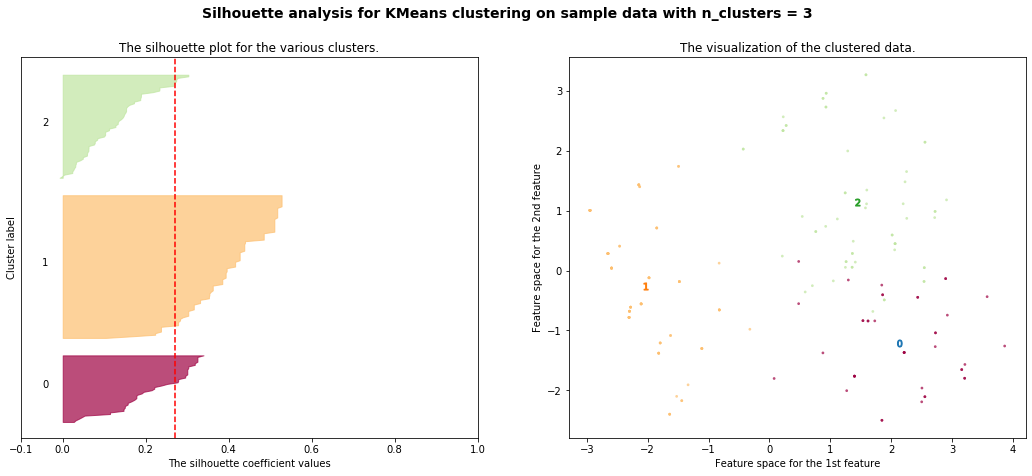

For n_clusters = 4 The average silhouette_score is : 0.20106202683494595


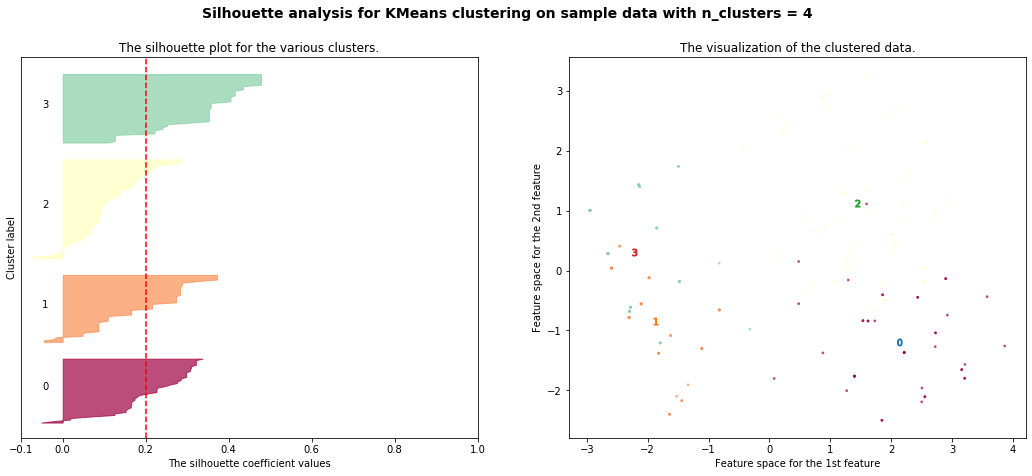

For n_clusters = 5 The average silhouette_score is : 0.2095114150913162


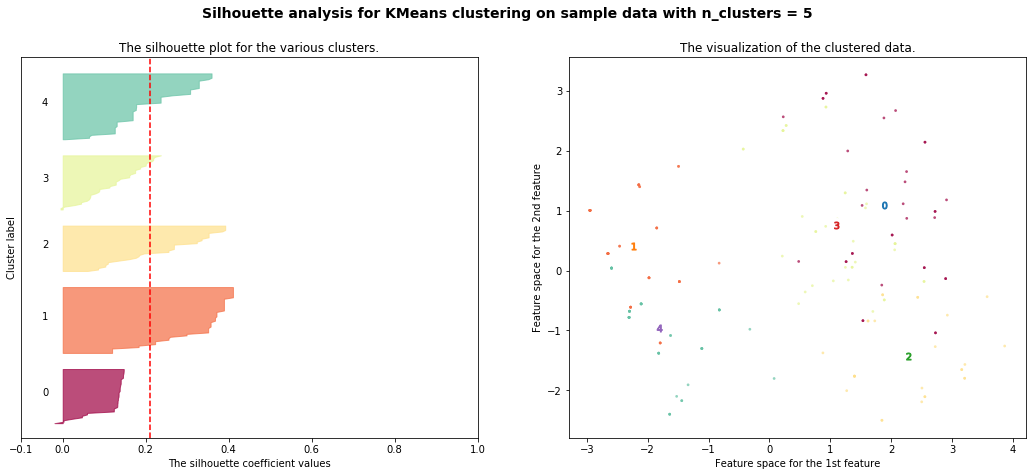

For n_clusters = 6 The average silhouette_score is : 0.22594548723675012


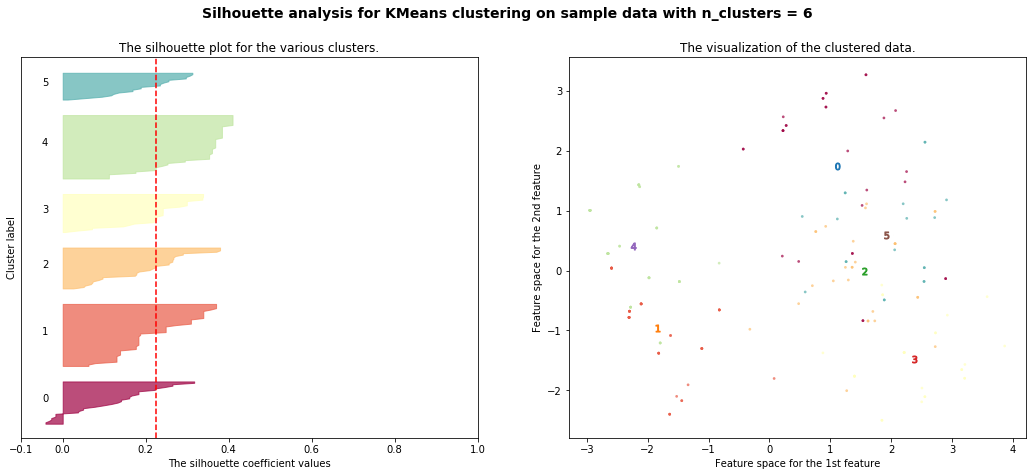

In [33]:
from sklearn.metrics import silhouette_samples, silhouette_score


import matplotlib.cm as cm

X=Proj_Xtrain_df.values

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

**At n_clusters = 2 silhouette_score is highest and we will consider cluster as 2**

In [34]:
kmeans = KMeans(n_clusters=2, n_init = 20, random_state=5)

In [35]:
kmeans.fit(Proj_Xtrain_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [36]:
centroids=kmeans.cluster_centers_

In [37]:
print(centroids)

[[-2.04850052 -0.25866374  0.03677078  0.05516518  0.0401737   0.03501257
   0.03234284 -0.10764788 -0.05368832]
 [ 1.71021603  0.21594863 -0.03069854 -0.04605533 -0.03353951 -0.02923068
  -0.02700182  0.08987116  0.04482236]]


In [38]:
colnames = ["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9"]
centroid_df = pd.DataFrame(centroids, columns = colnames )

In [39]:
print(centroid_df)

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.048501 -0.258664  0.036771  0.055165  0.040174  0.035013  0.032343   
1  1.710216  0.215949 -0.030699 -0.046055 -0.033540 -0.029231 -0.027002   

        PC8       PC9  
0 -0.107648 -0.053688  
1  0.089871  0.044822  


### 10. Create a new column in the train data and populate it with the cluster labels. 

In [40]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['Cluster_lbs_train']))
Proj_Xtrain_df.columns = colnames
with_label_df = Proj_Xtrain_df.join(df_labels) 
print(with_label_df.dropna())

          PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -1.850622  0.710918 -1.331043  0.221505  0.159787 -0.119927 -0.188302   
1   -0.429990  2.027491 -0.082747 -0.005378  0.323131 -1.051872 -0.232679   
2    2.713944  0.883693  1.793266 -1.306973 -0.360770  0.271946  0.847561   
3    0.928517  2.729019 -0.352954 -0.065634 -1.158163 -1.059865 -0.554446   
4   -2.592899  0.040815  0.700209 -0.396077 -0.528950  0.331849  0.338314   
5   -1.793477 -1.208353 -1.502299  0.880891  0.869177  0.736597 -0.522301   
6    2.213012 -1.367844 -1.014483  1.852649 -0.348517 -0.445943  0.783745   
7    2.056770  0.345598  1.544340 -0.783847 -1.763507 -0.760944 -0.107794   
8    1.595289  1.113554 -2.565889 -0.224778 -0.481446 -0.875857 -0.892718   
9   -2.946697  1.004051  0.125850  0.140066  0.256877 -0.262731 -0.077111   
10   2.213012 -1.367844 -1.014483  1.852649 -0.348517 -0.445943  0.783745   
11  -2.651670  0.283887 -1.049477 -0.053466  0.269190  0.324988 -0.203243   

In [41]:
with_label_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PC1,200.0,-1.931788e-16,2.029068,-2.946697,-2.106450,0.275317,1.847817,3.863499
PC2,200.0,8.076873e-17,1.321560,-2.499098,-0.837306,-0.120591,0.923830,3.267114
PC3,200.0,6.772360e-17,1.215142,-2.825448,-0.988495,-0.086246,0.831311,2.828912
PC4,200.0,-3.441691e-17,1.118732,-2.366087,-0.589610,-0.011820,0.487001,2.388792
PC5,200.0,-2.081668e-18,0.901819,-2.389341,-0.528950,0.083350,0.585714,2.555758
PC6,200.0,1.265654e-16,0.775126,-1.568271,-0.545629,-0.078723,0.538680,1.978637
PC7,200.0,4.787837e-17,0.755653,-1.902308,-0.393382,-0.062169,0.369542,2.419812
PC8,200.0,2.275957e-17,0.665799,-1.393594,-0.468543,-0.060074,0.439778,2.224263
PC9,200.0,-1.021405e-16,0.594299,-1.416224,-0.410468,-0.115567,0.419351,1.547916
Cluster_lbs_train,200.0,5.450000e-01,0.499220,0.000000,0.000000,1.000000,1.000000,1.000000


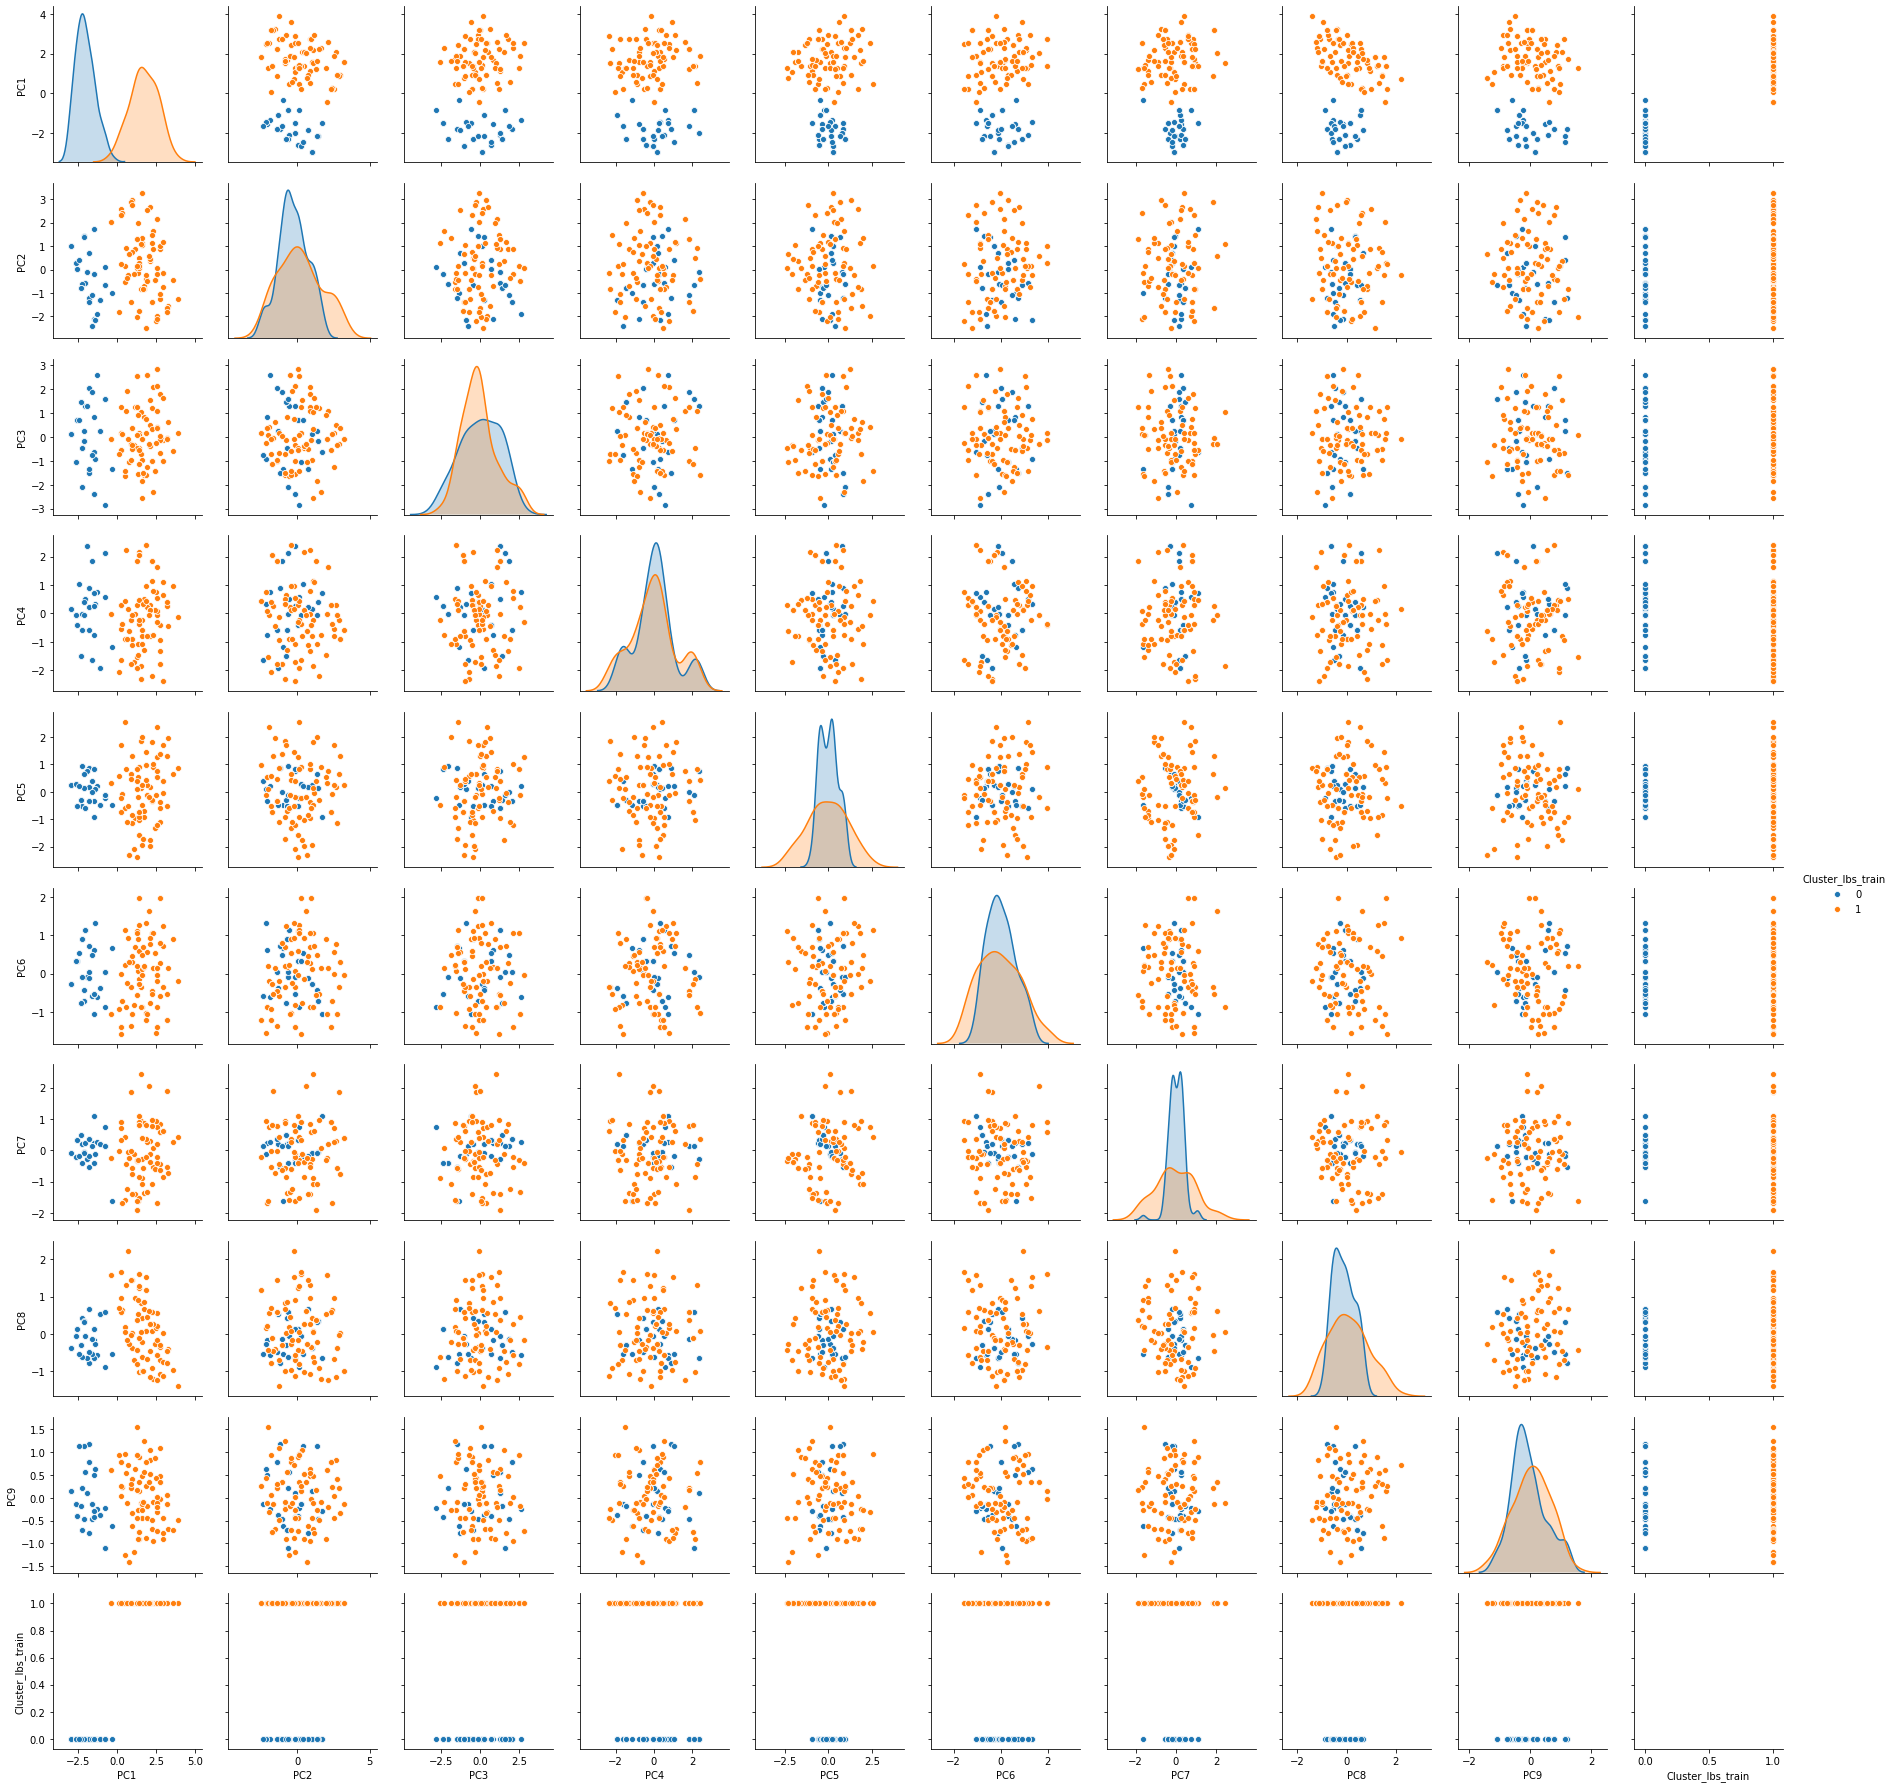

In [42]:
sns.pairplot(with_label_df,hue = 'Cluster_lbs_train')

### 11. Transform the test data using the same PCA object that was fit on the train data. 

In [43]:
Test_X_std = sc.fit_transform(X_test)  # scale data 

In [44]:
PCA_Xtest_fit = pca.fit_transform(Test_X_std)  ## projecting original data into principal components

In [45]:
Proj_Xtest_df = pd.DataFrame(PCA_Xtest_fit)

### 12. Use the same kmeans object, assign cluster labels to the test data and store it as a feature. 

In [46]:
kmeans.fit(Proj_Xtest_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [47]:
centroids_test=kmeans.cluster_centers_

In [48]:
print(centroids_test)

[[-1.29719094e+00  2.56278322e-02  2.26895067e-01  8.07326915e-02
  -4.85701217e-03  1.28556727e-01  4.11795591e-02  2.81001748e-02
   9.53150662e-04]
 [ 2.75653074e+00 -5.44591435e-02 -4.82152018e-01 -1.71556970e-01
   1.03211509e-02 -2.73183044e-01 -8.75065632e-02 -5.97128715e-02
  -2.02544516e-03]]


In [49]:
centroid_test_df = pd.DataFrame(centroids_test, columns = colnames )
centroid_test_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-1.297191,0.025628,0.226895,0.080733,-0.004857,0.128557,0.041180,0.028100,0.000953
1,2.756531,-0.054459,-0.482152,-0.171557,0.010321,-0.273183,-0.087507,-0.059713,-0.002025


In [50]:
df_test_labels = pd.DataFrame(kmeans.labels_ , columns = list(['Cluster_lbs_test']))
Proj_Xtest_df.columns = colnames
with_label_test_df = Proj_Xtest_df.join(df_test_labels) 
print(with_label_test_df.dropna())

         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   2.049437 -2.229361  0.152598 -0.054843 -0.419986 -0.190458 -0.978694   
1   2.609057  0.317043 -0.956209  0.538800 -0.873707 -0.663467  0.968223   
2  -0.142924  2.659132  1.276031  0.678405  0.163495 -1.017780  0.165109   
3  -1.740924 -1.195205 -1.835650  1.374915  0.812021  0.370571  0.539225   
4  -3.473007  0.785335 -0.449410 -0.959398  1.116331 -1.309013 -0.360005   
5   0.616367 -0.974195  2.701218  1.210800  1.481304 -0.166169 -0.293725   
6  -1.127408  1.324897  0.952912 -1.417791 -0.674281  0.947495  1.346921   
7   3.109484  1.208014 -0.631427 -0.763997  0.462589  0.250114 -0.263846   
8  -0.987606  1.677127  2.498343 -1.433828  0.731794  0.201277 -0.366862   
9   0.465754 -1.954529  2.074314 -1.006704  0.735007  1.080563  0.872975   
10  3.109484  1.208014 -0.631427 -0.763997  0.462589  0.250114 -0.263846   
11  2.797520 -1.331366  1.067614  0.261358  0.948652 -0.037767  0.278622   
12 -1.399822

### 13. Apply SVC model on train dataset and predict target for test dataset. 

### Support Vector Classifier

In [51]:
from sklearn.svm import SVC

In [52]:
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [53]:
y_predict = svc_model.predict(X_test)

In [54]:
y_predict

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0])

In [55]:
ct1 = pd.DataFrame(y_test, columns = ["Y_Test"])
ct2 = pd.DataFrame(y_predict, columns = ["Y_Predicted"])
print(pd.concat([ct1, ct2], axis=1))

    Y_Test  Y_Predicted
0        0            0
1        0            0
2        1            1
3        1            1
4        1            1
5        1            1
6        1            1
7        0            0
8        1            1
9        1            1
10       0            0
11       0            0
12       1            1
13       1            1
14       1            1
15       1            1
16       1            1
17       0            0
18       1            1
19       0            0
20       0            0
21       0            0
22       1            1
23       1            1
24       0            0
25       1            1
26       1            1
27       1            1
28       0            0
29       1            1
30       1            1
31       1            1
32       1            1
33       1            1
34       1            1
35       1            1
36       1            1
37       1            1
38       1            1
39       0            0
40       0      

In [56]:
ct1["Y_Test"].value_counts()

1    34
0    16
Name: Y_Test, dtype: int64

In [57]:
ct2["Y_Predicted"].value_counts()

1    34
0    16
Name: Y_Predicted, dtype: int64

In [58]:
pd.crosstab(y_test, y_predict, rownames=['Actual Result'], colnames=['Predicted Result'], margins=True)

Predicted Result,0,1,All
Actual Result,,,
0,16,0,16
1,0,34,34
All,16,34,50


### 14. Check accuracy and confusion matrix. 

In [59]:
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix

In [60]:
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

1.0
1.0


In [61]:
print("Confusion Matrix:\n",confusion_matrix(y_test, y_predict))

Confusion Matrix:
 [[16  0]
 [ 0 34]]


In [62]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        34

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

